In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

# Ruta a la carpeta en Google Drive
folder_path = "/content/drive/My Drive/Mediciones_Cuestionario_8"

# Listar todas las imágenes en la carpeta
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpeg')]

def process_image(image_path, start_pixel, end_pixel, line):
    """
    Procesa una imagen y grafica el perfil de intensidad entre los píxeles start_pixel y end_pixel en la línea central.

    image_path: Ruta de la imagen.
    start_pixel: Índice del píxel inicial.
    end_pixel: Índice del píxel final.
    """
    # Cargar la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Obtener el ancho y alto de la imagen
    height, width = image.shape

    # Línea horizontal en el centro de la imagen
    line_center = line

    # Extraer la intensidad desde start_pixel hasta end_pixel
    intensity_profile = image[line_center, start_pixel:end_pixel]

    # Graficar el perfil de intensidad
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(start_pixel, end_pixel), intensity_profile, '--r', label = 'Datos experimentales')
    plt.title(f'Perfil de Intensidad - {os.path.basename(image_path)}')
    plt.xlabel('Posición (píxeles)')
    plt.ylabel('Intensidad')
    plt.legend()
    plt.grid(True)
    plt.show()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


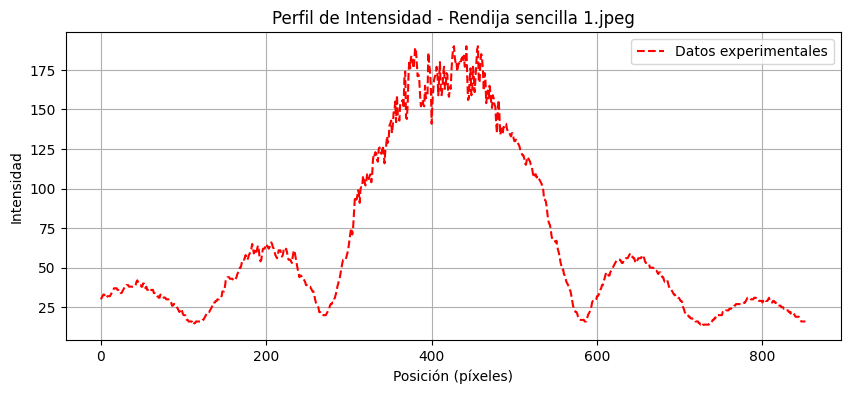

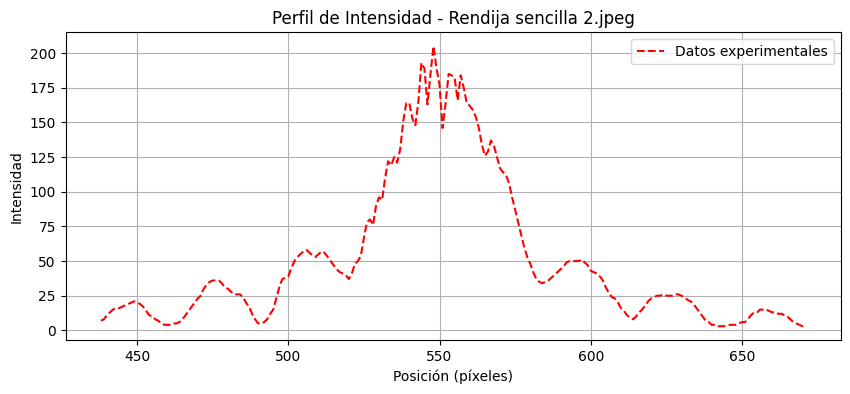

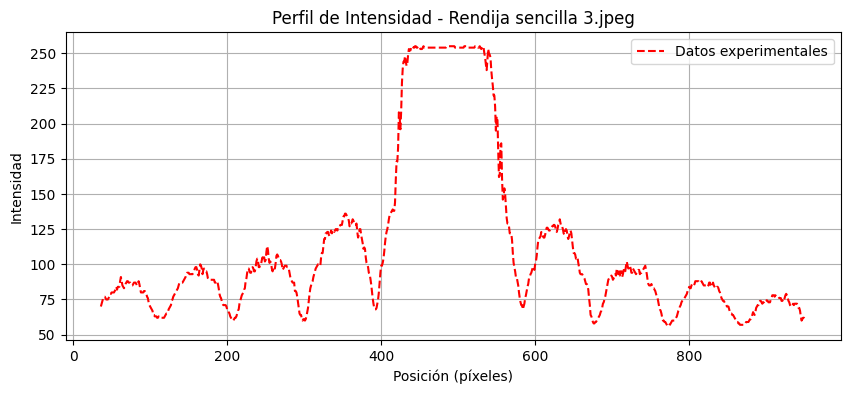

In [ ]:
# Parámetros para los píxeles específicos
start_pixel1 = 0
end_pixel1 = 853
line1 = 622

start_pixel2 = 438
end_pixel2 = 672
line2 = 562

start_pixel3 = 36
end_pixel3 = 952
line3 = 514

# Procesar cada imagen y graficar el perfil de intensidad

process_image(image_files[0], start_pixel1, end_pixel1, line1)
process_image(image_files[1], start_pixel2, end_pixel2, line2)
process_image(image_files[2], start_pixel3, end_pixel3, line3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


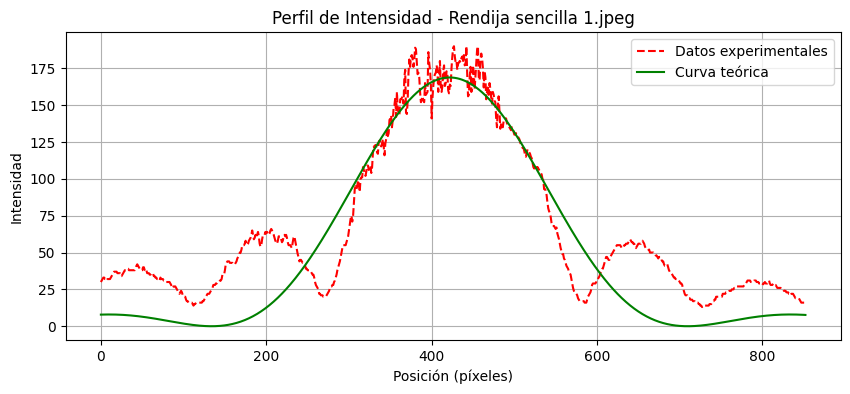

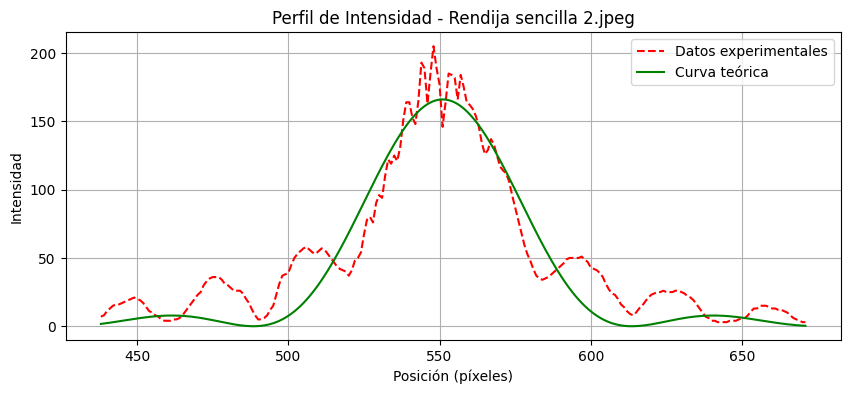

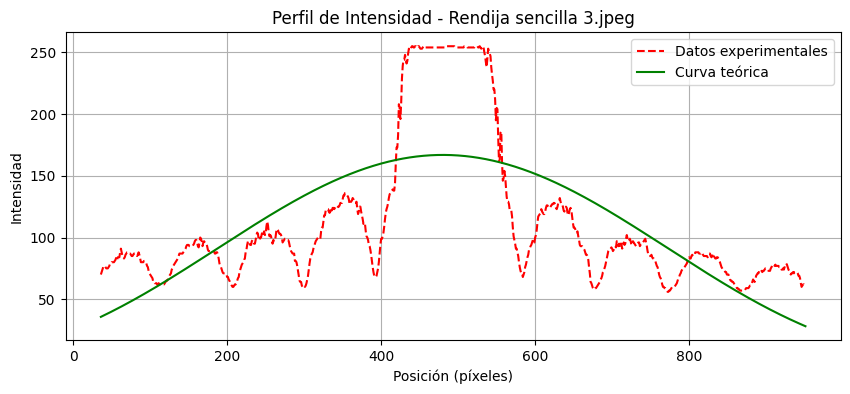

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

# Ruta a la carpeta en Google Drive
folder_path = "/content/drive/My Drive/Mediciones_Cuestionario_8"

# Listar todas las imágenes en la carpeta
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpeg')]

# Función teórica basada en el patrón de difracción (sinc^2)
def diffraction_pattern(x, I0, x0, scale):
    return I0 * (np.sinc(scale * (x - x0)))**2

def process_image(image_path, start_pixel, end_pixel, line):
    # Cargar la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Extraer la intensidad desde start_pixel hasta end_pixel en la línea especificada
    intensity_profile = image[line, start_pixel:end_pixel]

    # Crear el eje X correspondiente
    x_data = np.arange(start_pixel, end_pixel)

    # Ajuste de la curva de difracción a los datos experimentales
    popt, _ = curve_fit(diffraction_pattern, x_data, intensity_profile, p0=[255, (start_pixel + end_pixel) // 2, 0.01])

    # Graficar el perfil de intensidad junto con la curva de ajuste
    plt.figure(figsize=(10, 4))
    plt.plot(x_data, intensity_profile, '--r', label='Datos experimentales')  # Datos experimentales
    plt.plot(x_data, diffraction_pattern(x_data, *popt), '-g', label='Curva teórica')  # Curva teórica ajustada
    plt.title(f'Perfil de Intensidad - {os.path.basename(image_path)}')
    plt.xlabel('Posición (píxeles)')
    plt.ylabel('Intensidad')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parámetros para los píxeles específicos
start_pixel1 = 0
end_pixel1 = 853
line1 = 622

start_pixel2 = 438
end_pixel2 = 672
line2 = 562

start_pixel3 = 36
end_pixel3 = 952
line3 = 514

# Procesar cada imagen y graficar el perfil de intensidad con la curva de ajuste
process_image(image_files[0], start_pixel1, end_pixel1, line1)
process_image(image_files[1], start_pixel2, end_pixel2, line2)
process_image(image_files[2], start_pixel3, end_pixel3, line3)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


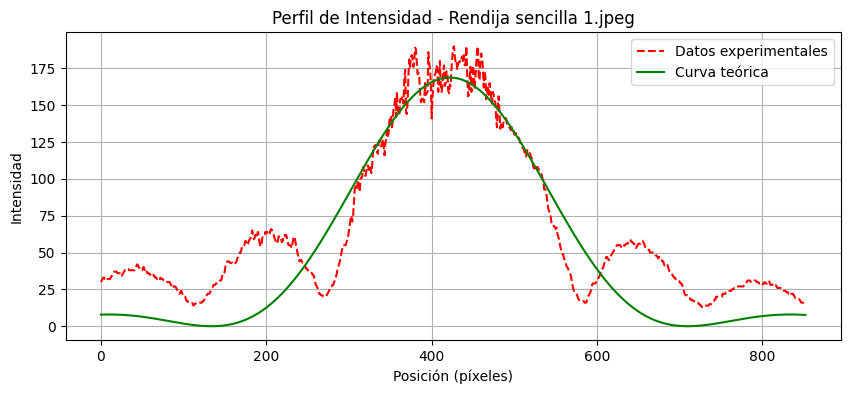

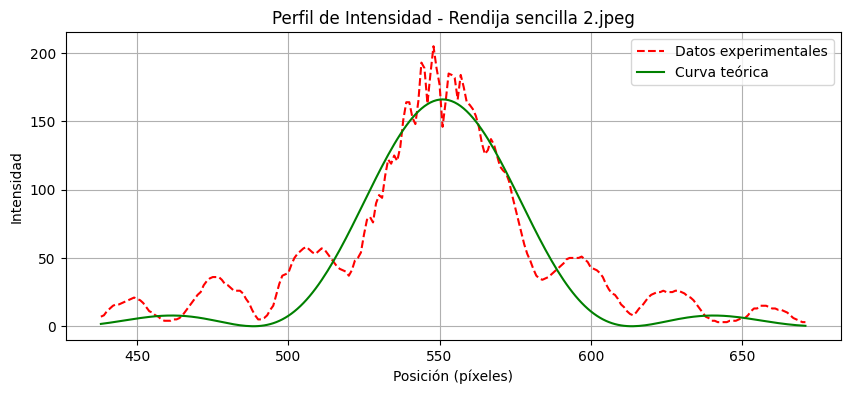

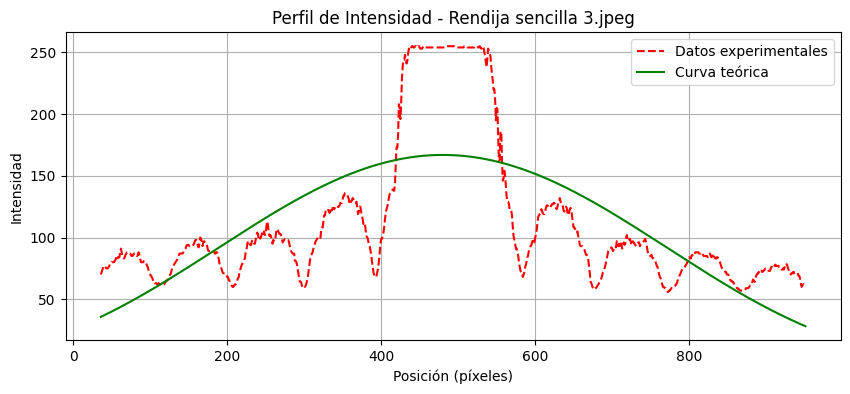

In [ ]:
# Montar Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Importar bibliotecas necesarias
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.optimize import curve_fit

# Ruta a la carpeta en Google Drive
folder_path = "/content/drive/My Drive/Mediciones_Cuestionario_8"

# Listar todas las imágenes en la carpeta
image_files = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if f.endswith('.jpeg')]

# Función teórica basada en el patrón de difracción (sinc^2)
def diffraction_pattern(x, I0, x0, scale):
    """ Patrón de difracción de una rendija sencilla (sinc^2) """
    return I0 * (np.sinc(scale * (x - x0)))**2

def process_image(image_path, start_pixel, end_pixel, line, x0, scale):
    """
    Procesa una imagen, ajusta el perfil de intensidad con el patrón de difracción y grafica el resultado.
    image_path: Ruta de la imagen.
    start_pixel, end_pixel: Píxeles que definen el rango horizontal.
    line: Línea horizontal de interés.
    scale: Escala para la función teórica (relacionada con a, λ y L).
    """
    # Cargar la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Extraer la intensidad desde start_pixel hasta end_pixel en la línea especificada
    intensity_profile = image[line, start_pixel:end_pixel]

    # Crear el eje X correspondiente
    x_data = np.arange(start_pixel, end_pixel)

    # Ajuste de la curva teórica a los datos experimentales
    try:
        popt, _ = curve_fit(diffraction_pattern, x_data, intensity_profile, p0=[255, x0, scale])

        # Graficar el perfil de intensidad junto con la curva de ajuste
        plt.figure(figsize=(10, 4))
        plt.plot(x_data, intensity_profile, '--r', label='Datos experimentales')  # Datos experimentales
        plt.plot(x_data, diffraction_pattern(x_data, *popt), '-g', label='Curva teórica')  # Curva teórica ajustada
        plt.title(f'Perfil de Intensidad - {os.path.basename(image_path)}')
        plt.xlabel('Posición (píxeles)')
        plt.ylabel('Intensidad')
        plt.legend()
        plt.grid(True)
        plt.show()
    except RuntimeError:
        print(f"No se pudo ajustar la curva para {os.path.basename(image_path)}")

# Parámetros para cada imagen
# Los valores de scale pueden calcularse previamente según el ancho de la rendija, longitud de onda y distancia a la pantalla.
start_pixel1, end_pixel1, line1, x01, scale1 = 0, 853, 622, 426, 0.021  # Ejemplo para la primera imagen
start_pixel2, end_pixel2, line2, x02, scale2 = 438, 672, 562, 555, 0.091
start_pixel3, end_pixel3, line3, x03, scale3 = 36, 952, 514, 494, 0.038

# Procesar cada imagen con su respectivo scale
process_image(image_files[0], start_pixel1, end_pixel1, line1, x01, scale1)
process_image(image_files[1], start_pixel2, end_pixel2, line2, x02, scale2)
process_image(image_files[2], start_pixel3, end_pixel3, line3, x03, scale3)

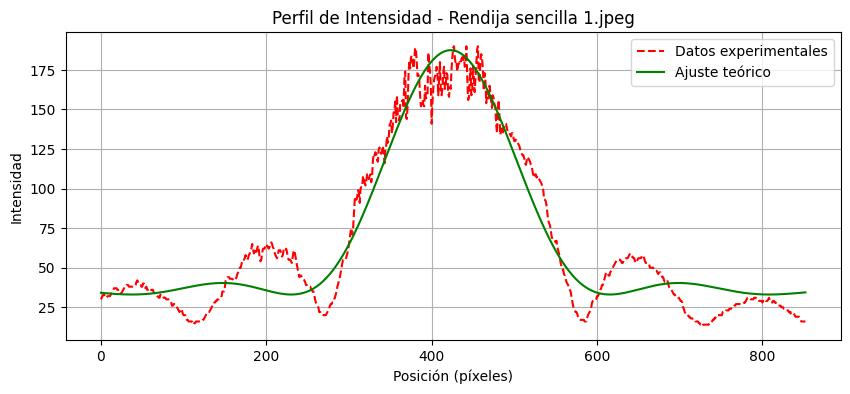

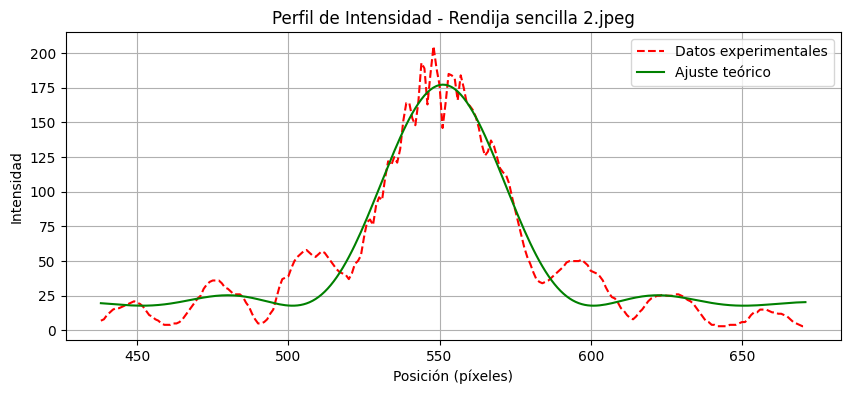

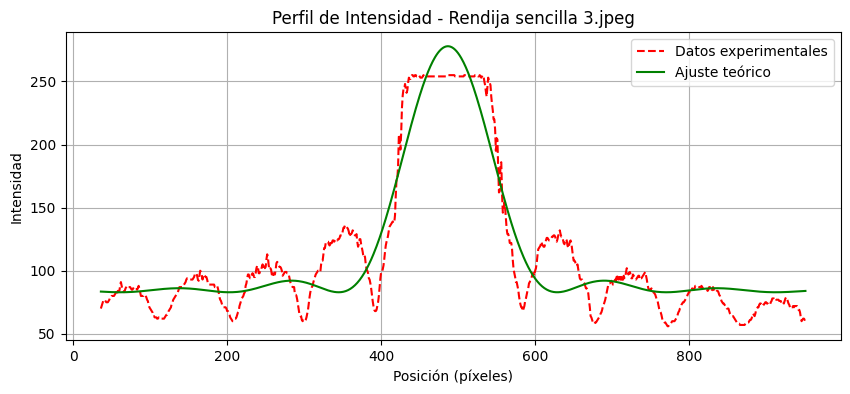

In [ ]:
# Función teórica mejorada con nivel de fondo y amplitud
def diffraction_pattern(x, A, x0, scale, offset):
    """ Patrón de difracción de una rendija sencilla (sinc^2) con amplitud y nivel de fondo """
    return A * (np.sinc(scale * (x - x0)))**2 + offset

def process_image(image_path, start_pixel, end_pixel, line):
    """
    Procesa una imagen, ajusta el perfil de intensidad con el patrón de difracción mejorado y grafica el resultado.
    """
    # Cargar la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Extraer la intensidad desde start_pixel hasta end_pixel en la línea especificada
    intensity_profile = image[line, start_pixel:end_pixel]

    # Crear el eje X correspondiente
    x_data = np.arange(start_pixel, end_pixel)

    # Ajuste de la curva teórica a los datos experimentales
    try:
        # Establecer parámetros iniciales p0
        p0 = [np.max(intensity_profile), (start_pixel + end_pixel) // 2, 0.01, np.min(intensity_profile)]
        popt, _ = curve_fit(diffraction_pattern, x_data, intensity_profile, p0=p0)

        # Graficar el perfil de intensidad junto con la curva de ajuste
        plt.figure(figsize=(10, 4))
        plt.plot(x_data, intensity_profile, '--r', label='Datos experimentales')  # Datos experimentales
        plt.plot(x_data, diffraction_pattern(x_data, *popt), '-g', label='Ajuste teórico')  # Curva ajustada
        plt.title(f'Perfil de Intensidad - {os.path.basename(image_path)}')
        plt.xlabel('Posición (píxeles)')
        plt.ylabel('Intensidad')
        plt.legend()
        plt.grid(True)
        plt.show()
    except RuntimeError:
        print(f"No se pudo ajustar la curva para {os.path.basename(image_path)}")

# Parámetros para cada imagen
start_pixel1, end_pixel1, line1 = 0, 853, 622
start_pixel2, end_pixel2, line2 = 438, 672, 562
start_pixel3, end_pixel3, line3 = 36, 952, 514

# Procesar cada imagen
process_image(image_files[0], start_pixel1, end_pixel1, line1)
process_image(image_files[1], start_pixel2, end_pixel2, line2)
process_image(image_files[2], start_pixel3, end_pixel3, line3)

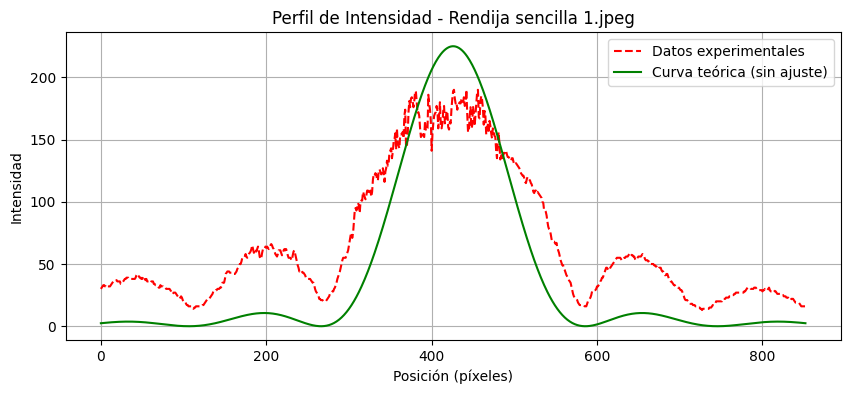

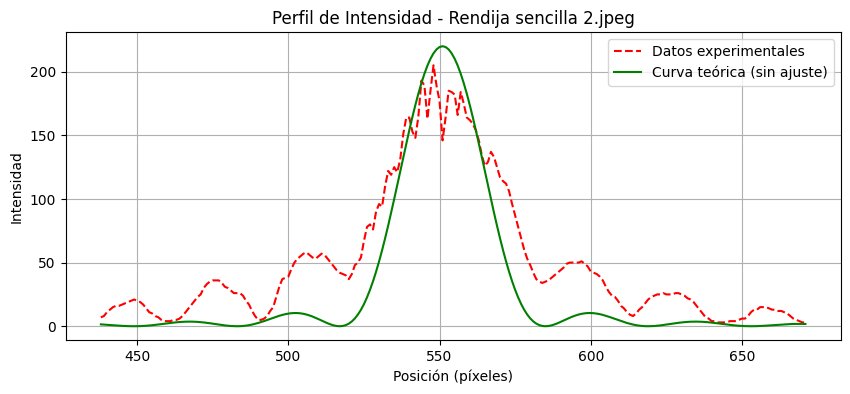

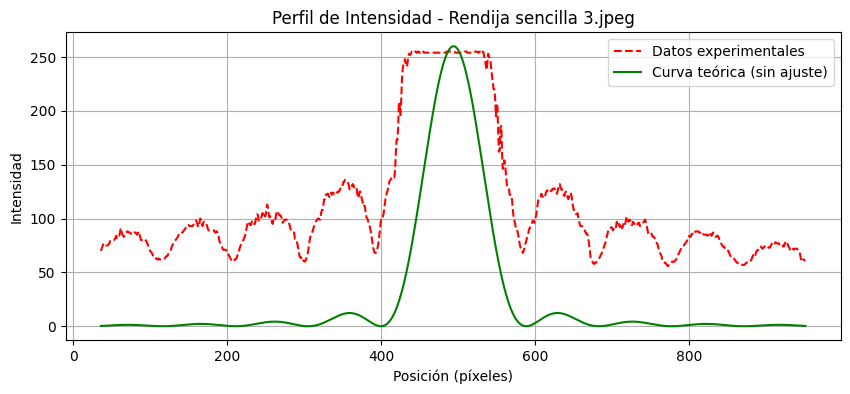

In [64]:
# Función teórica para el patrón de difracción
def theoretical_intensity(x, x0, I0, d, scale, wavelength=6.5e-4):
    """ Calcula la intensidad teórica basada en la fórmula dada """
    theta = (scale * (x-x0)) / (np.sqrt((scale * (x-x0))**2 + 5020**2))
    return I0 * (np.sinc((d * np.pi * np.sin(theta)) / wavelength))**2

def process_image_with_theoretical_plot(image_path, start_pixel, end_pixel, line, I0, d, scale, x0):
    """
    Procesa una imagen, grafica el perfil de intensidad experimental y añade la curva teórica.
    """
    # Cargar la imagen en escala de grises
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Extraer la intensidad desde start_pixel hasta end_pixel en la línea especificada
    intensity_profile = image[line, start_pixel:end_pixel]

    # Crear el eje X correspondiente
    x_data = np.arange(start_pixel, end_pixel)

    # Calcular la intensidad teórica para los mismos valores de x
    theoretical_profile = theoretical_intensity(x_data, x0, I0, d, scale)

    # Graficar el perfil de intensidad experimental junto con la curva teórica
    plt.figure(figsize=(10, 4))
    plt.plot(x_data, intensity_profile, '--r', label='Datos experimentales')  # Datos experimentales
    plt.plot(x_data, theoretical_profile, '-g', label='Curva teórica (sin ajuste)')  # Curva teórica
    plt.title(f'Perfil de Intensidad - {os.path.basename(image_path)}')
    plt.xlabel('Posición (píxeles)')
    plt.ylabel('Intensidad')
    plt.legend()
    plt.grid(True)
    plt.show()

# Parámetros para cada imagen (define d y scale según el caso)

x01=426
x02=551
x03=494

start_pixel1, end_pixel1, line1, I01, d1, scale1 = 0, 853, 622, 225, 0.13, 0.05
start_pixel2, end_pixel2, line2, I02, d2, scale2 = 438, 672, 562, 220, 0.43, 0.071
start_pixel3, end_pixel3, line3, I03, d3, scale3 = 36, 952, 514, 260, 0.11, 0.1

# Procesar cada imagen con su respectivo d y scale
process_image_with_theoretical_plot(image_files[0], start_pixel1, end_pixel1, line1, I01, d1, scale1, x01)
process_image_with_theoretical_plot(image_files[1], start_pixel2, end_pixel2, line2, I02, d2, scale2, x02)
process_image_with_theoretical_plot(image_files[2], start_pixel3, end_pixel3, line3, I03, d3, scale3, x03)